In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N_t=130
I_t=0

In [3]:
def red_wolf_population_df(N_0,I_0,time):
    df=pd.DataFrame({
        "Time (Years)":[0],
        "N_t":[N_0],
        "I_t":[I_0]})
    for i in np.arange(1,time+1):
        N_0=1.06*N_0+0.28*I_0
        I_0=10+0.57*I_0
        x={"Time (Years)":i,"N_t":N_0,"I_t":I_0}
        df=df.append(x,ignore_index=True)
    return df

In [4]:
df=red_wolf_population_df(130,0,5)

In [5]:
df

,Time (Years),N_t,I_t
0,0.0,130.000000,0.00000
1,1.0,137.800000,10.00000
2,2.0,148.868000,15.70000
3,3.0,162.196080,18.94900
4,4.0,177.233565,20.80093
5,5.0,193.691839,21.85653


In [6]:
def red_wolf_population_goal(N_0,I_0,goal_pop):
    t=0
    while N_0<goal_pop:
        N_0=1.06*N_0+0.28*I_0
        I_0=10+0.57*I_0
        t+=1
    return N_0,t

In [7]:
red_wolf_population_goal(N_t,I_t,220)

(230.40747073691688, 7)

In [8]:
df_graph=red_wolf_population_df(130,0,200)

In [9]:
N_t_exp=np.exp(np.polyfit(x=df_graph["Time (Years)"][df_graph["I_t"]>22.255],y=np.log(df_graph["N_t"][df_graph["I_t"]>22.255]),deg=1))

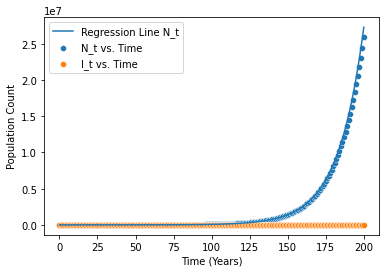

In [10]:
sns.lineplot(data=df_graph,x="Time (Years)",y=N_t_exp[1]*np.power(N_t_exp[0],df_graph["Time (Years)"]),label="Regression Line N_t")
sns.scatterplot(data=df_graph,x="Time (Years)",y="N_t",label="N_t vs. Time")
sns.scatterplot(data=df_graph,x="Time (Years)",y="I_t", label="I_t vs. Time")
plt.ylabel("Population Count")
plt.savefig("Math_142_Homework_2_Q_1_a")

In [11]:
np.corrcoef(x=df_graph["Time (Years)"],y=np.log(df_graph["N_t"]))

array([[1.       , 0.9996912],
       [0.9996912, 1.       ]])

In [12]:
L_c=np.array([[1,3/2],[2,1/2]])

In [13]:
N_c=np.array([[100],[200]])

In [14]:
np.matmul(L_c,N_c)

array([[400.],
       [300.]])

In [15]:
def leslie_calc(L,N_0,time):
    df_L=pd.DataFrame({
    "time":[0],
    "N_0":[N_0[0][0]],
    "N_1":[N_0[1]][0]})
    for i in np.arange(1,time+1):
        N_0=np.matmul(L,N_0)
        x={"time":i,"N_0":N_0[0][0],"N_1":N_0[1][0]}
        df_L=df_L.append(x,ignore_index=True)
    return df_L

In [16]:
df_L_c=leslie_calc(L_c,N_c,3)
df_L_c

,time,N_0,N_1
0,0.0,100.0,200.0
1,1.0,400.0,300.0
2,2.0,850.0,950.0
3,3.0,2275.0,2175.0


In [17]:
N_c_1=np.array([[1],[1]])
df_L_c_1=leslie_calc(L_c,N_c_1,6)
df_L_c_1

,time,N_0,N_1
0,0.0,1.000000,1.000000
1,1.0,2.500000,2.500000
2,2.0,6.250000,6.250000
3,3.0,15.625000,15.625000
4,4.0,39.062500,39.062500
5,5.0,97.656250,97.656250
6,6.0,244.140625,244.140625


In [18]:
np.matmul(L_c,N_c_1)/2.5

array([[1.],
       [1.]])